In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV,GridSearchCV,cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')




In [4]:
school_df = pd.read_csv('../week 3 Task/new_data.csv', index_col=0)

X = school_df.drop('Target', axis=1).values
y = school_df['Target'].values
X


array([[ 1.09229759, -0.58029774,  0.44104966, ...,  1.        ,
         0.        ,  0.        ],
       [-0.14072283, -0.58029774, -2.31734353, ...,  1.        ,
         0.        ,  0.        ],
       [-0.50296612, -0.45457202,  0.48597438, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.57993279,  0.80268511,  0.84458352, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.87948012, -0.45457202,  0.48597438, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.75408822, -0.2031206 ,  0.56973886, ...,  0.        ,
         0.        ,  0.        ]])

In [5]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [6]:
X_train

array([[ 0.56983131, -0.70602345,  0.27776506, ...,  0.        ,
         0.        ,  0.        ],
       [-0.47510125, -0.45457202, -0.10942327, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.57993279, -0.70602345,  0.39382011, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.61476388, -0.45457202,  0.48597438, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.09612855,  2.18566796,  0.90811038, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84847999,  2.05994224, -2.31734353, ...,  1.        ,
         0.        ,  0.        ]])

In [7]:
y_train

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

## Logistic Regression

In [8]:
logreg = LogisticRegression()

In [9]:
# Performing cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

Cross-validation scores: [0.90613718 0.90942029 0.9057971  0.92753623 0.92028986 0.88768116
 0.91666667 0.92028986 0.9057971  0.91304348]
Mean cross-validation score: 0.9112658923245958


In [10]:
logreg.fit(X_train,y_train)
train_pred = logreg.predict(X_train)
test_pred = logreg.predict(X_test)
logreg_pred_proba=logreg.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(train_pred,y_train))
print('testing accuracy: ',accuracy_score(test_pred,y_test))

training accuracy:  0.9152480985150308
testing accuracy:  0.9232995658465991


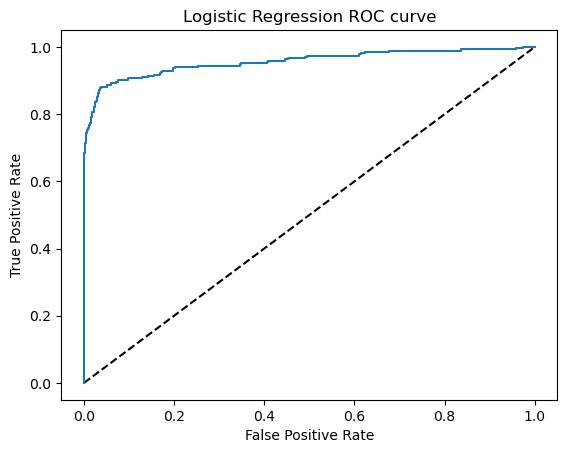

In [11]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,logreg_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

In [12]:
# Calculating the area under the curve
roc_auc_score(y_test,logreg_pred_proba)

0.9559560354257084

In [13]:
print("Confusion matrix:\n", confusion_matrix(y_test, test_pred))
print("Classification report:\n", classification_report(y_test, test_pred))

Confusion matrix:
 [[410  13]
 [ 40 228]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       423
           1       0.95      0.85      0.90       268

    accuracy                           0.92       691
   macro avg       0.93      0.91      0.92       691
weighted avg       0.92      0.92      0.92       691



In [14]:
def plot_learning_curve(model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01,1,50), verbose=1)
   
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training scores")
    plt.plot(train_sizes, test_mean, label="Testing scores")

    plt.title(f'{model} Learning curve')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    

[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   55.0s finished


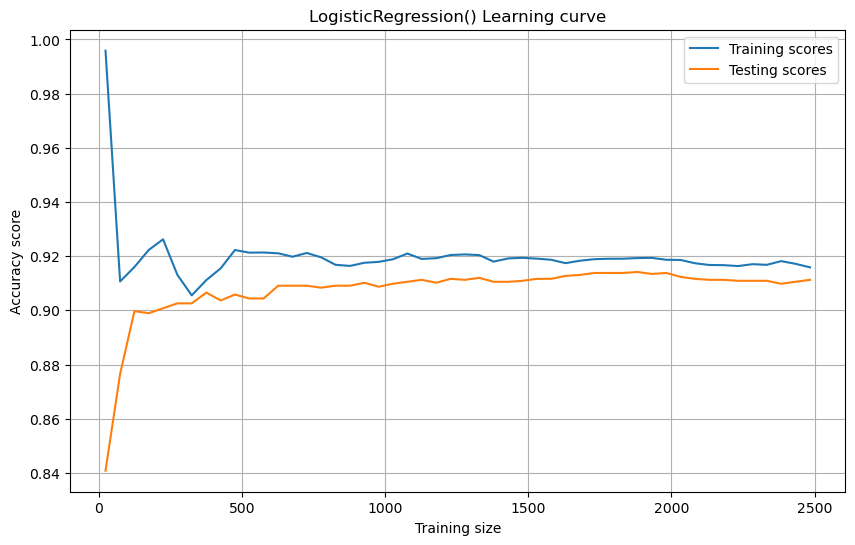

In [15]:
plot_learning_curve(logreg)

## Traditional Machine Learning Models  
1. Decision Trees
2. Random Forests
3. Support Vector Machines
4. Gradient Boosting Machines (e.g., XGBmances

## Decision Tree Classifier

In [16]:
dt = DecisionTreeClassifier()

In [17]:
# Performing cross-validation
dt_scores = cross_val_score(dt, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", dt_scores)
print("Mean cross-validation score:", np.mean(dt_scores))

Cross-validation scores: [0.83754513 0.88043478 0.87318841 0.88043478 0.86594203 0.82246377
 0.86594203 0.88768116 0.86231884 0.84782609]
Mean cross-validation score: 0.8623777010411761


In [18]:
dt.fit(X_train,y_train)
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)
dt_pred_proba=dt.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(dt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(dt_test_pred,y_test))

training accuracy:  1.0
testing accuracy:  0.8654124457308249


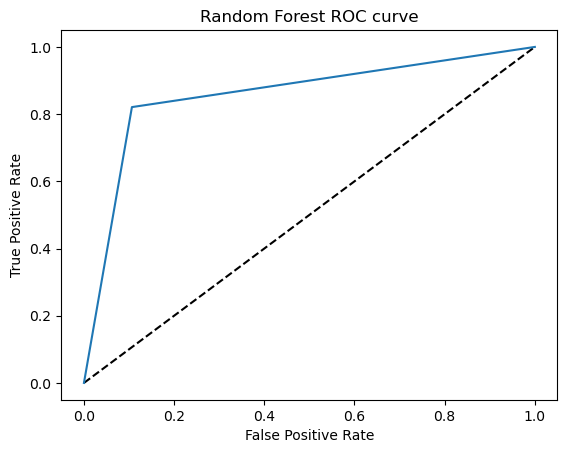

In [19]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,dt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [20]:
# Calculating the area under the curve
roc_auc_score(y_test,dt_pred_proba)

0.8572562718323277

In [21]:
print("Confusion matrix:\n", confusion_matrix(y_test, dt_test_pred))
print("Classification report:\n", classification_report(y_test, dt_test_pred))

Confusion matrix:
 [[378  45]
 [ 48 220]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       423
           1       0.83      0.82      0.83       268

    accuracy                           0.87       691
   macro avg       0.86      0.86      0.86       691
weighted avg       0.87      0.87      0.87       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.3s finished


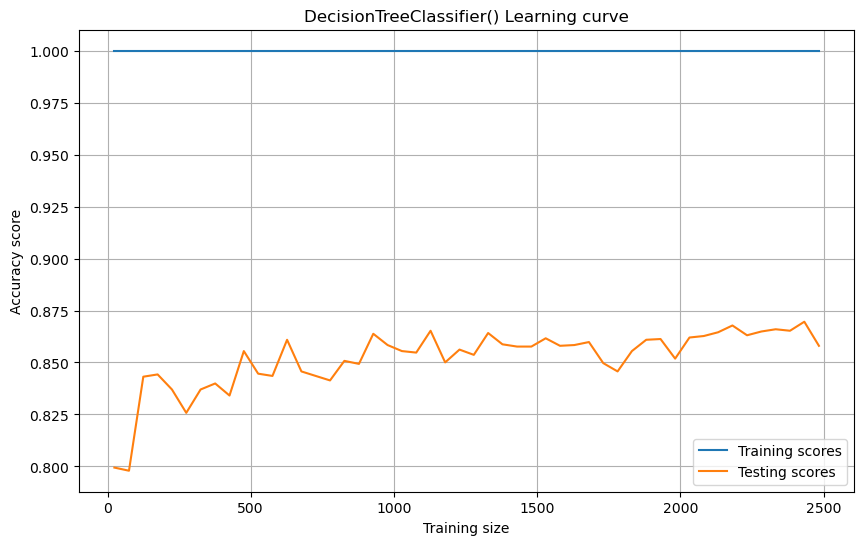

In [22]:
plot_learning_curve(dt)

## Support Vector Machine

In [23]:
svm = SVC()

In [24]:
# Performing cross-validation
svm_scores = cross_val_score(svm, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", svm_scores)
print("Mean cross-validation score:", np.mean(svm_scores))

Cross-validation scores: [0.90974729 0.92391304 0.9057971  0.92391304 0.9057971  0.89855072
 0.92028986 0.91666667 0.90942029 0.92028986]
Mean cross-validation score: 0.9134384973578191


In [25]:
svm.fit(X_train,y_train)
svm_train_pred = svm.predict(X_train)
svm_test_pred = svm.predict(X_test)
print('training accuracy: ',accuracy_score(svm_train_pred,y_train))
print('testing accuracy: ',accuracy_score(svm_test_pred,y_test))

training accuracy:  0.9185077870336834
testing accuracy:  0.914616497829233


In [26]:
print("Confusion matrix:\n", confusion_matrix(y_test, svm_test_pred))
print("Classification report:\n", classification_report(y_test, svm_test_pred))

Confusion matrix:
 [[412  11]
 [ 48 220]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       423
           1       0.95      0.82      0.88       268

    accuracy                           0.91       691
   macro avg       0.92      0.90      0.91       691
weighted avg       0.92      0.91      0.91       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   54.4s finished


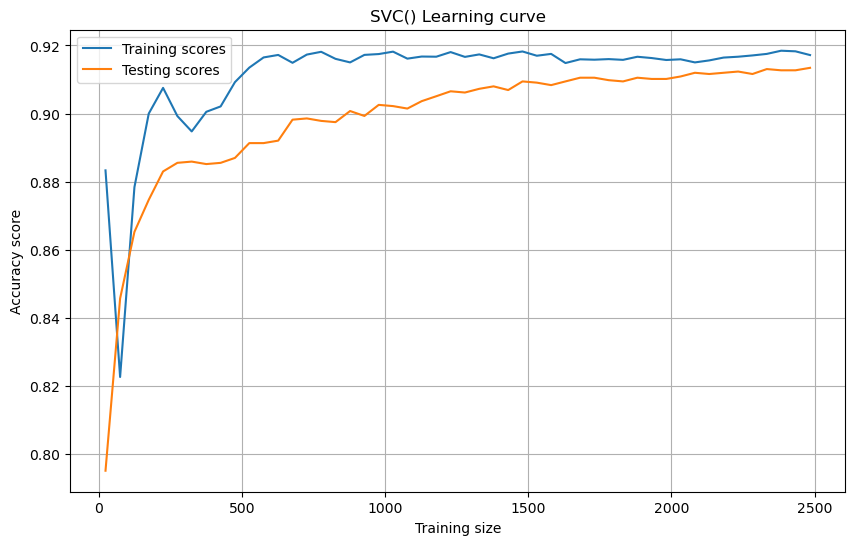

In [27]:
plot_learning_curve(svm)

## Random Forest Classifier

In [28]:
rf = RandomForestClassifier()

In [29]:
# Performing cross-validation
rf_scores = cross_val_score(rf, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", rf_scores)
print("Mean cross-validation score:", np.mean(rf_scores))

Cross-validation scores: [0.89530686 0.92028986 0.90942029 0.92391304 0.90217391 0.89492754
 0.92028986 0.91666667 0.91304348 0.89855072]
Mean cross-validation score: 0.9094582221524616


In [30]:
rf.fit(X_train,y_train)
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
rf_pred_proba=rf.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(rf_train_pred,y_train))
print('testing accuracy: ',accuracy_score(rf_test_pred,y_test))

training accuracy:  1.0
testing accuracy:  0.91027496382055


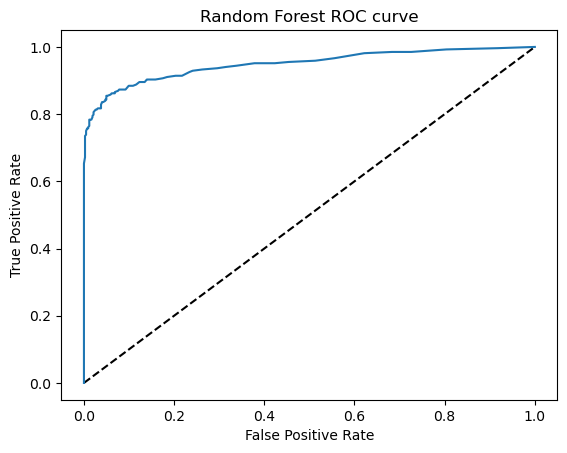

In [31]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,rf_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

In [32]:
# Calculating the area under the curve
roc_auc_score(y_test,rf_pred_proba)

0.9488550157016338

In [33]:
print("Confusion matrix:\n", confusion_matrix(y_test, rf_test_pred))
print("Classification report:\n", classification_report(y_test, rf_test_pred))

Confusion matrix:
 [[410  13]
 [ 49 219]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       423
           1       0.94      0.82      0.88       268

    accuracy                           0.91       691
   macro avg       0.92      0.89      0.90       691
weighted avg       0.91      0.91      0.91       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished


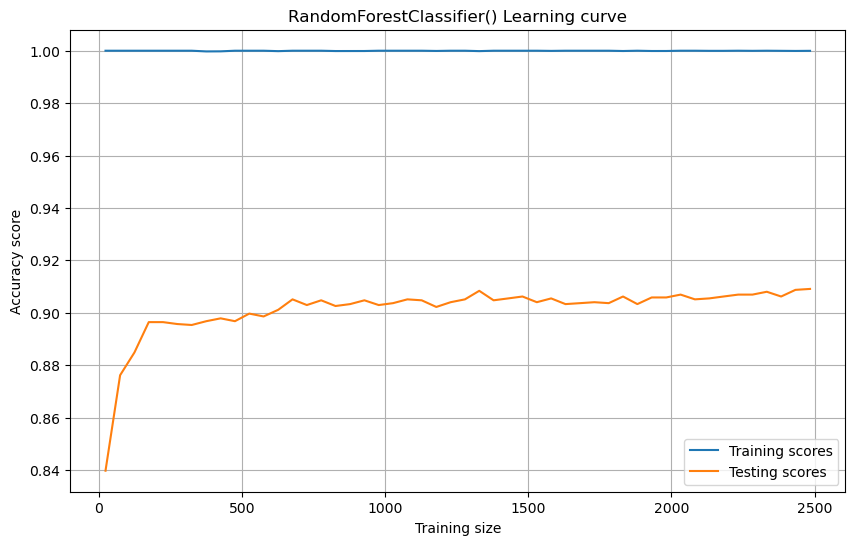

In [34]:
plot_learning_curve(rf)

## Gradient Boosting Classifier

In [35]:
gbt = GradientBoostingClassifier()

In [36]:
# Performing cross-validation
gbt_scores = cross_val_score(gbt, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", gbt_scores)
print("Mean cross-validation score:", np.mean(gbt_scores))

Cross-validation scores: [0.90613718 0.91304348 0.90942029 0.92028986 0.9057971  0.88768116
 0.91666667 0.90942029 0.92028986 0.92028986]
Mean cross-validation score: 0.9109035734840161


In [37]:
gbt.fit(X_train,y_train)
gbt_train_pred = gbt.predict(X_train)
gbt_test_pred = gbt.predict(X_test)
gbt_pred_proba=gbt.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(gbt_train_pred,y_train))
print('testing accuracy: ',accuracy_score(gbt_test_pred,y_test))

training accuracy:  0.9467584208620066
testing accuracy:  0.9218523878437048


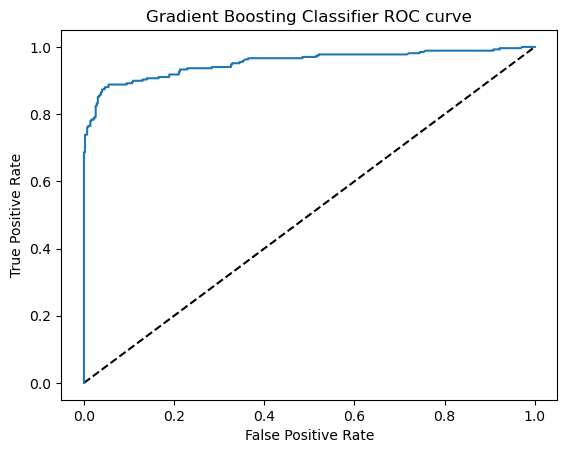

In [38]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,gbt_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC curve')
plt.show()

In [39]:
# Calculating the area under the curve
roc_auc_score(y_test,gbt_pred_proba)

0.953384672382767

In [40]:
print("Confusion matrix:\n", confusion_matrix(y_test, gbt_test_pred))
print("Classification report:\n", classification_report(y_test, gbt_test_pred))

Confusion matrix:
 [[410  13]
 [ 41 227]]
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       423
           1       0.95      0.85      0.89       268

    accuracy                           0.92       691
   macro avg       0.93      0.91      0.92       691
weighted avg       0.92      0.92      0.92       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.7min finished


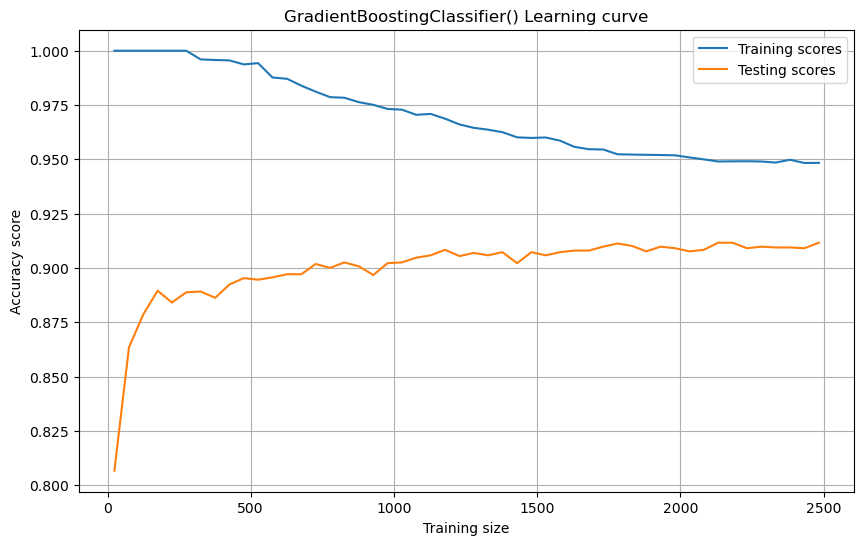

In [41]:
plot_learning_curve(gbt)

# XGBCLASSIFIER

In [53]:
xgb = XGBClassifier()

In [54]:
# Performing cross-validation
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=10)  # 10-fold cross-validation

# Printing the scores
print("Cross-validation scores:", xgb_scores)
print("Mean cross-validation score:", np.mean(xgb_scores))

Cross-validation scores: [0.90974729 0.91304348 0.92028986 0.90942029 0.88768116 0.86594203
 0.90217391 0.91304348 0.90217391 0.90942029]
Mean cross-validation score: 0.9032935698215873


In [55]:
xgb.fit(X_train,y_train)
xgb_train_pred = xgb.predict(X_train)
xgb_test_pred = xgb.predict(X_test)
xgb_pred_proba=xgb.predict_proba(X_test)[:,1]
print('training accuracy: ',accuracy_score(xgb_train_pred,y_train))
print('testing accuracy: ',accuracy_score(xgb_test_pred,y_test))

training accuracy:  0.9992756247736327
testing accuracy:  0.9160636758321273


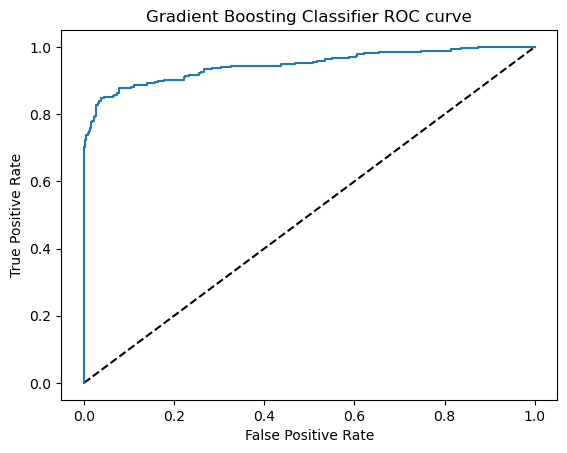

In [56]:
# Plotting the roc_curve
fpr,tpr,threshold=roc_curve(y_test,xgb_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier ROC curve')
plt.show()

In [57]:
roc_auc_score(y_test,xgb_pred_proba)

0.9461028192371476

In [58]:
print("Confusion matrix:\n", confusion_matrix(y_test, xgb_test_pred))
print("Classification report:\n", classification_report(y_test, xgb_test_pred))

Confusion matrix:
 [[408  15]
 [ 43 225]]
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       423
           1       0.94      0.84      0.89       268

    accuracy                           0.92       691
   macro avg       0.92      0.90      0.91       691
weighted avg       0.92      0.92      0.92       691



[learning_curve] Training set sizes: [  24   75  125  175  225  275  325  376  426  476  526  576  627  677
  727  777  827  878  928  978 1028 1078 1128 1179 1229 1279 1329 1379
 1430 1480 1530 1580 1630 1681 1731 1781 1831 1881 1931 1982 2032 2082
 2132 2182 2233 2283 2333 2383 2433 2484]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.5min finished


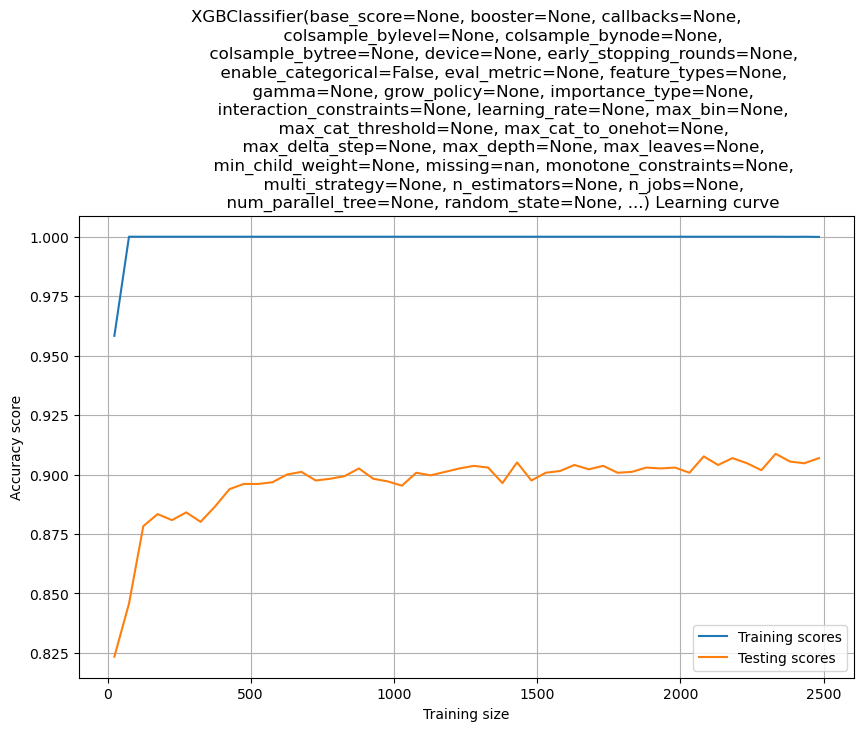

In [59]:
plot_learning_curve(xgb)

## Deep Learning Models 
1.  Design and implement a neural network architecture2. • Train the neural network using TensorFlow or PyTorc3. 
• Experiment with different architectures (e.g., number of layers, neurons)


In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [61]:
# Create a model class that inherits the nn.Module

class Model(nn.Module):
    def __init__(self, in_features=29, h1=25, h2=20, h3=15, h4=10, output_features=2):
        super().__init__()   # Instantiate our nn.Module
        self.fc1=nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.fc4 = nn.Linear(h3,h4)
        self.out= nn.Linear(h4,output_features)

    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=F.relu(self.fc4(x))
        x= self.out(x)

        return x

In [62]:
# Pick a random seed for randomization
torch.manual_seed(41)

# Create an instance of model
model = Model()

In [63]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to tensors long(int)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

#  Setthe criterion of model to measure the error
criterion = CrossEntropyLoss()

# Set the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [64]:
# Train our model
epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')
    i+=1

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.6982636451721191
Epoch: 10 Loss: 0.4577119052410126
Epoch: 20 Loss: 0.2723909914493561
Epoch: 30 Loss: 0.2277251034975052
Epoch: 40 Loss: 0.22125066816806793
Epoch: 50 Loss: 0.21568956971168518
Epoch: 60 Loss: 0.2110396772623062
Epoch: 70 Loss: 0.20674729347229004
Epoch: 80 Loss: 0.20230814814567566
Epoch: 90 Loss: 0.19760270416736603


Text(0.5, 0, 'Epochs')

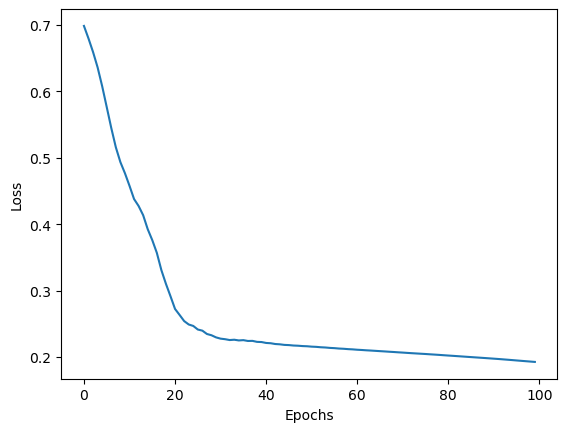

In [65]:
# Graph
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [66]:
# Evaluate Model on Test Data Set
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

print(f'Loss: {loss}')

Loss: 0.24059197306632996


In [67]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)


    print(f'{i+1}. {str(y_val)} \t {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1. tensor([-10.5610,   4.5185]) 	 1
2. tensor([ 0.7189, -2.1177]) 	 0
3. tensor([-1.9344,  0.9835]) 	 1
4. tensor([ 0.0130, -1.5905]) 	 0
5. tensor([-2.5429,  1.3491]) 	 1
6. tensor([ 1.2251, -3.0149]) 	 0
7. tensor([-0.3077, -0.3473]) 	 1
8. tensor([-4.8784,  2.2617]) 	 1
9. tensor([ 0.6528, -2.4347]) 	 0
10. tensor([-1.7589,  0.9408]) 	 1
11. tensor([-6.1856,  2.7690]) 	 1
12. tensor([ 0.9733, -2.5607]) 	 0
13. tensor([ 0.0100, -1.2252]) 	 0
14. tensor([-8.8935,  3.8637]) 	 1
15. tensor([ 0.6921, -2.3779]) 	 0
16. tensor([ 1.1555, -2.4374]) 	 0
17. tensor([-3.0706,  1.5549]) 	 1
18. tensor([ 0.8369, -2.2801]) 	 1
19. tensor([ 1.0357, -2.8010]) 	 1
20. tensor([ 0.9781, -2.3568]) 	 0
21. tensor([-5.8548,  2.6407]) 	 1
22. tensor([ 0.7994, -2.5315]) 	 0
23. tensor([-7.0345,  3.1326]) 	 1
24. tensor([ 0.4167, -1.9094]) 	 1
25. tensor([ 0.8937, -2.3357]) 	 0
26. tensor([ 0.4458, -2.2714]) 	 0
27. tensor([-11.7022,   4.9333]) 	 1
28. tensor([ 1.0400, -2.3798]) 	 0
29. tensor([ 1.3182, -2.8

In [68]:
torch.save(model.state_dict(), 'my_pytorch_model.pt')

In [69]:
import pickle
with open('logisticRegression_model', 'wb' ) as LR:
    pickle.dump(logreg,LR)

with open('RandomForestClassifier_model', 'wb' ) as RFC:
    pickle.dump(rf,RFC)

with open('DecisionTreeClassifier_model', 'wb' ) as DTC:
    pickle.dump(dt,DTC)

with open('SVM_model', 'wb' ) as SVM:
    pickle.dump(svm,SVM)

with open('GradientBoostClassifier_model', 'wb' ) as GBC:
    pickle.dump(gbt,GBC)